Importing the dataset

In [60]:
import pandas as pd 
data = pd.read_csv(r                            "H:\University\3-2\3211\Last Offline Lab\apples_and_oranges.csv")

In [61]:
data.head(5)

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


Splitting the dataset into training and test samples

In [62]:
from sklearn.model_selection import train_test_split 
training_set, test_set = train_test_split(data, test_size = 0.35, random_state = 1)

Classifying the predictors and target

In [63]:
X_train = training_set.iloc[:,0:2].values 
Y_train = training_set.iloc[:,2].values 
X_test = test_set.iloc[:,0:2].values 
Y_test = test_set.iloc[:,2].values

Initializing Support Vector Machine and fitting the training data

In [64]:
from sklearn.svm import SVC 
classifier = SVC(kernel='rbf', random_state = 1) 
classifier.fit(X_train,Y_train)

SVC(random_state=1)

Predicting the classes for test set

In [65]:
Y_pred = classifier.predict(X_test)

Attaching the predictions to test set for comparing

In [66]:
test_set["Predictions"] = Y_pred

Comparing the actual classes and predictions

In [67]:
test_set.head(5)

,Weight,Size,Class,Predictions
2,65,4.09,orange,orange
31,66,4.68,orange,orange
3,72,5.85,apple,apple
21,70,4.83,orange,apple
27,70,4.22,orange,orange


Calculating the accuracy of the predictions

In [68]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(Y_test,Y_pred) 
accuracy = float(cm.diagonal().sum())/len(Y_test) 
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)


Accuracy Of SVM For The Given Dataset :  0.9285714285714286


Visualizing the classifier

In [69]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
Y_train = le.fit_transform(Y_train)

In [70]:
from sklearn.svm import SVC 
classifier = SVC(kernel='rbf', random_state = 1) 
classifier.fit(X_train,Y_train)

SVC(random_state=1)

C:\Users\User\AppData\Local\Temp\ipykernel_22504\1235792960.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


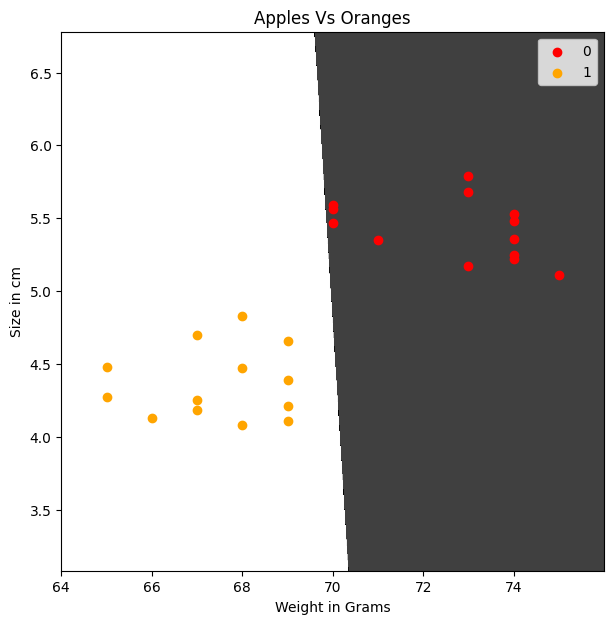

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

plt.figure(figsize=(7, 7))

X_set, y_set = X_train, Y_train 
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

plt.contourf(
    X1, X2,
    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75, cmap=ListedColormap(('black', 'white'))
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        c=ListedColormap(('red', 'orange'))(i), label=j
    )

plt.title('Apples Vs Oranges')
plt.xlabel('Weight in Grams')
plt.ylabel('Size in cm')
plt.legend()
plt.show()


Visualizing the predictions

C:\Users\User\AppData\Local\Temp\ipykernel_22504\763090080.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


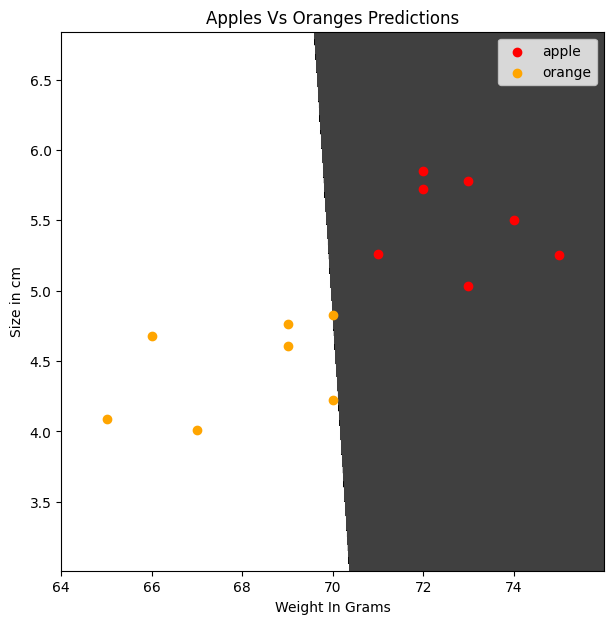

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.figure(figsize=(7, 7))

X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

plt.contourf(
    X1, X2,
    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75, cmap=ListedColormap(('black', 'white'))
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        c=ListedColormap(('red', 'orange'))(i), label=j
    )

plt.title('Apples Vs Oranges Predictions')
plt.xlabel('Weight In Grams')
plt.ylabel('Size in cm')
plt.legend()
plt.show()
